In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [50]:
#loading
data=sns.load_dataset("mpg")


In [51]:
#info on data
print(data.info())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.00000

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [75]:

#handling missing values

data.isnull().sum()
data.ffill(inplace=True)
data.isnull().sum()




mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

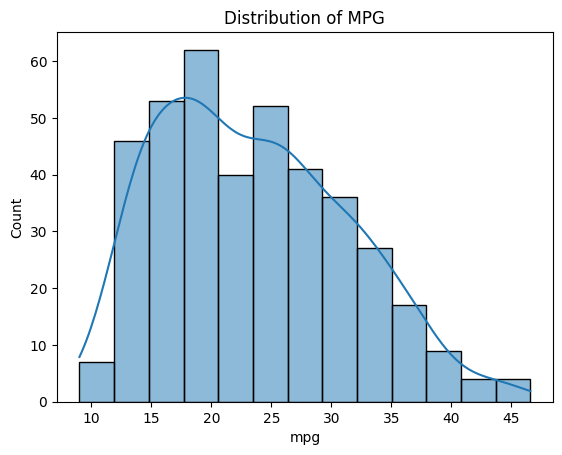

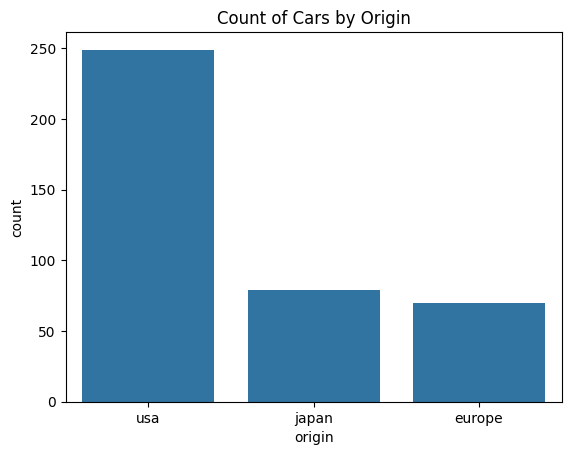

In [53]:
#Univariate analysis
#histogram
plt.Figure(figsize=(10,5))
sns.histplot(data['mpg'], kde=True)
plt.title('Distribution of MPG')
plt.show()


#countplot
plt.Figure(figsize=(10,5))
sns.countplot(x='origin', data=data)
plt.title('Count of Cars by Origin')
plt.show()

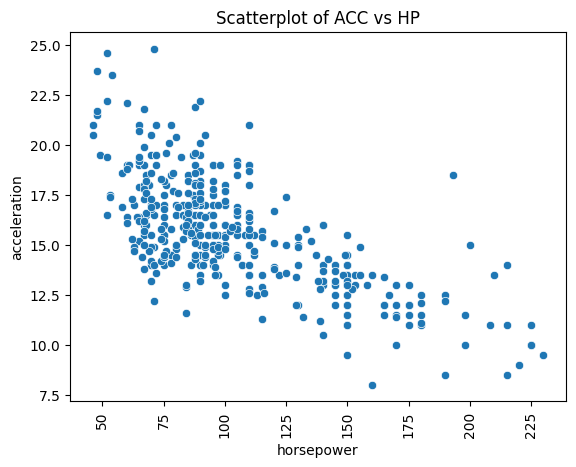

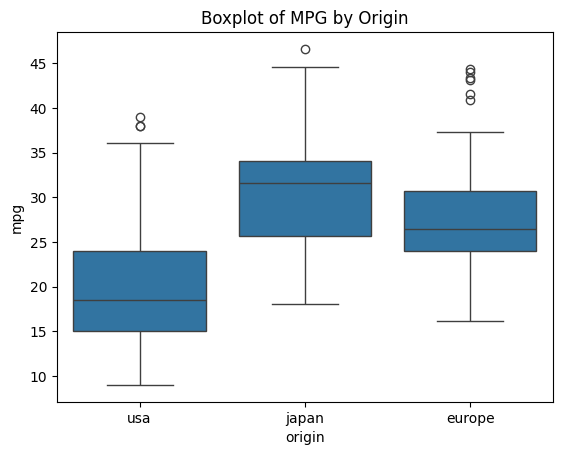

In [54]:
#Bivariate analysis

#scatterplot
plt.Figure(figsize=(10,5))
sns.scatterplot(x='horsepower', y='acceleration', data=data)
plt.xticks(rotation=90)
plt.title('Scatterplot of ACC vs HP')
plt.show()

#boxplot
plt.Figure(figsize=(10,5))
sns.boxplot(x='origin', y='mpg', data=data)
plt.title('Boxplot of MPG by Origin')
plt.show()

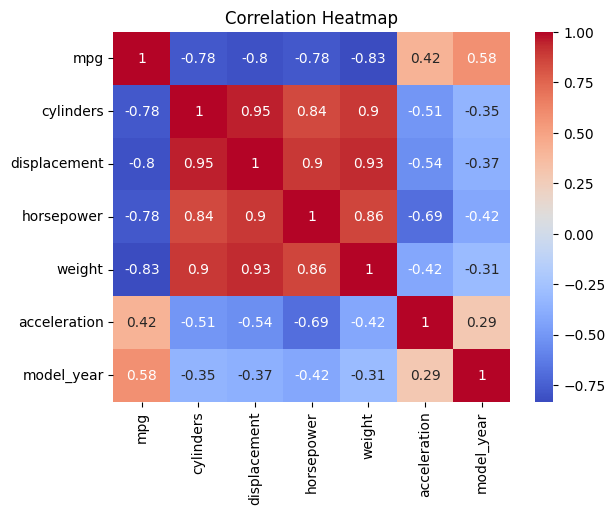

In [55]:
#correlation analysis

corr=data.corr(numeric_only=True)
plt.Figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

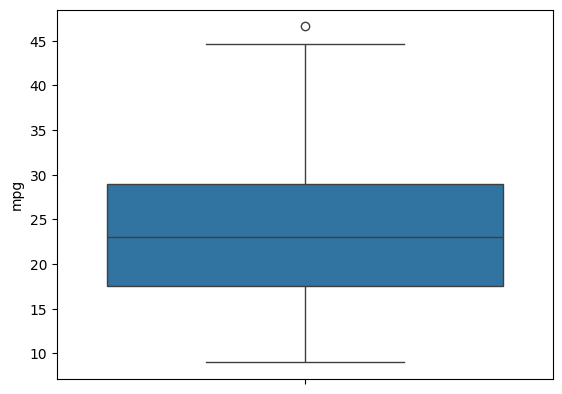

In [73]:

#outliers detection using boxplot

sns.boxplot(data['mpg'])
plt.show()


In [ ]:
#outlier removal

Q1=data['mpg'].quantile(0.25)
Q3=data['mpg'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
data_clean=data[(data['mpg']>=lower_bound) & (data['mpg']<=upper_bound)]

print(f"Original dataset size is: {data.shape}")
print(f"Clean dataset size is: {data_clean.shape}")
print(data_clean.shape)

Original dataset size is: (398, 9)
Clean dataset size is: (397, 9)
(397, 9)


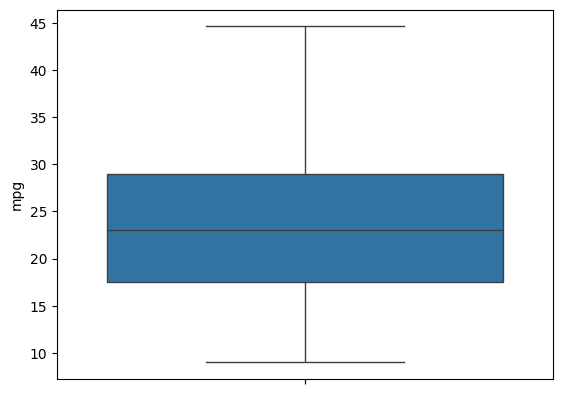

In [69]:
#boxplot after outlier removal
sns.boxplot(data_clean['mpg'])
plt.show()

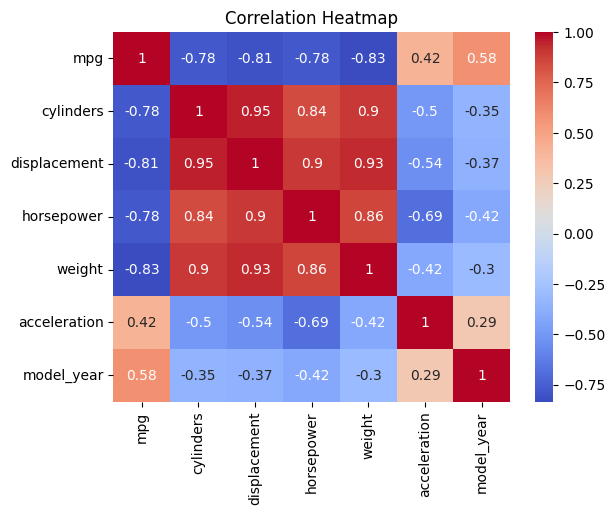

In [59]:
#correlation after outlier removal

corr=data_clean.corr(numeric_only=True)
plt.Figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [60]:
from functools import reduce
mpg_kpl = list(map(lambda mpg: mpg * 0.425, data['mpg'].dropna()))
print("First 5 mpg values in kpl:", mpg_kpl[:5])


high_mpg_cars = data[data['mpg'].notna()]
high_mpg = list(filter(lambda mpg: mpg > 30, high_mpg_cars['mpg']))
print("Cars with mpg > 30:", high_mpg)


mpg_sum = reduce(lambda x, y: x + y, data['mpg'].dropna())
print("Sum of all mpg values:", mpg_sum)

First 5 mpg values in kpl: [7.6499999999999995, 6.375, 7.6499999999999995, 6.8, 7.225]
Cars with mpg > 30: [31.0, 35.0, 31.0, 32.0, 31.0, 32.0, 31.0, 33.0, 33.0, 32.0, 31.5, 36.0, 33.5, 30.5, 33.5, 30.5, 43.1, 36.1, 32.8, 39.4, 36.1, 30.9, 31.5, 31.9, 34.1, 35.7, 34.2, 34.5, 31.8, 37.3, 33.5, 41.5, 38.1, 32.1, 37.2, 34.3, 31.3, 37.0, 32.2, 46.6, 40.8, 44.3, 43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 35.0, 32.4, 39.1, 39.0, 35.1, 32.3, 37.0, 37.7, 34.1, 34.7, 34.4, 33.0, 34.5, 33.7, 32.4, 32.9, 31.6, 30.7, 34.0, 31.0, 36.0, 37.0, 31.0, 38.0, 36.0, 36.0, 36.0, 34.0, 38.0, 32.0, 38.0, 38.0, 32.0, 36.0, 44.0, 32.0, 31.0]
Sum of all mpg values: 9358.800000000003
